Fourier space solution to radial hamiltonian with local square well interaction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy import integrate

In [228]:
#constants
hbar= 1.
mass = 1.
L = 10.
oam = 0
V0 = 10
R0 = 4
n_max = 200
r_dim = n_max
# n_space = 1+np.arange(nmax)
n_space = np.arange(n_max)
r_space = np.linspace(0,L,r_dim)

In [229]:
def basis(r,n):
    y = np.sin((n+1)*np.pi*r/L)
    return np.sqrt(2/L)*y

def KE(n):
    z = hbar*np.pi*n/L
    return 0.5*z*z/mass

def KErot(m,n,l):
    z = hbar*hbar*l*(l+1)*np.pi*np.pi*0.5/(mass*L*L)
    return z*min(m,n)

def square_well(r,r0,v0):
    v = np.zeros(r.shape)
    v[r<r0] = -v0
    return v

def inner_product(x,y,space):
    return integrate.simps(x*y,space)
    
def square_well_int(m,n,r0,v0):
    return inner_product(basis(r_space,m),square_well(r_space,r0,v0)*basis(r_space,n),r_space)
    
def fourier_to_coord(wfn_f):
    wfn_r = np.sum([wfn_f[k]*basis(r_space,k) for k in n_space],axis=0)
    return wfn_r

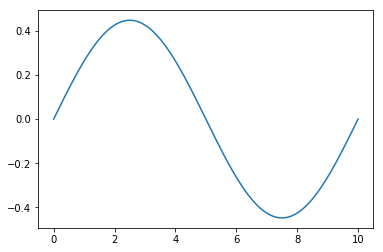

In [230]:
wfn = [basis(r_space,n) for n in n_space]
plt.plot(r_space,wfn[1])
plt.show()

In [231]:
T = np.zeros((n_max,n_max))
V = np.zeros((n_max,n_max))
Trot = np.zeros((n_max,n_max))
for i in range(0,n_max):
    T[i,i] = KE(i)
for i in range(n_max):
    for j in range(n_max):
        V[i,j] = square_well_int(i,j,R0,V0)
for i in range(n_max):
    for j in range(n_max):
        Trot[i,j] = KErot(i,j,oam)
H = T + Trot + V

In [244]:
evals,evecs = la.eig(H)
idx = evals.argsort()[::-1]   
idx = np.flipud(idx)
evals = evals[idx]
evecs = evecs[:,idx]

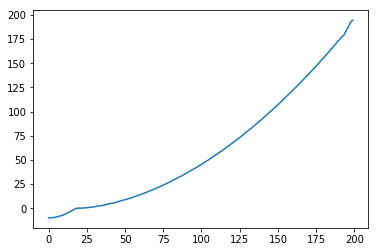

In [245]:
plt.plot(evals)
plt.show()

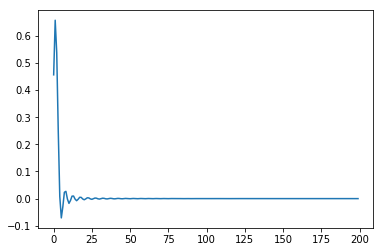

In [246]:
plt.plot(n_space,evecs[:,0])
plt.show()


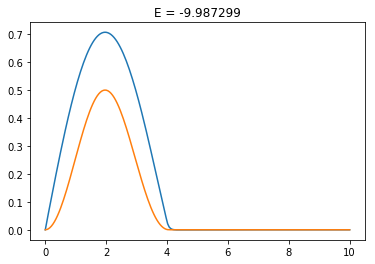

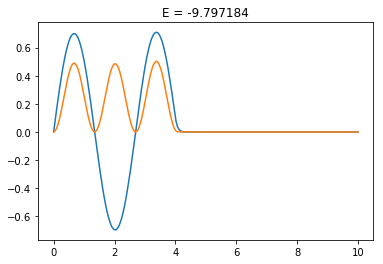

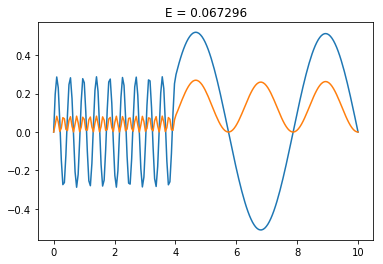

In [257]:
def plot_coord(k):
    wfn_r = fourier_to_coord(evecs[:,k])
    prob_r = fourier_to_coord(evecs[:,k])**2
    plt.plot(r_space,wfn_r)
    plt.plot(r_space,prob_r)
    plt.title("E = %f" % evals[k])
    plt.show()
plot_coord(0)
plot_coord(2)
plot_coord(20)